In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('precision', 2)

In [2]:
data = pd.read_csv("/project/normalization-runs/normalization-results.csv")
data_other = pd.read_csv("/project/normalization-runs/normalization-results-cicddos2019-top.csv")
data_other_other = pd.read_csv("/project/normalization-runs/normalization-results-unswnb15.csv")
data = pd.concat([data, data_other, data_other_other], ignore_index=True)
AVERAGE = True
data.head(5)

,model,train dataset,test dataset,features,accuracy,precision,recall,FPR,F1 score,notes
0,per_dd_DQN_1.pkl,nslkdd,nslkdd,117,0.76,0.93,0.65,0.08,0.77,NaN
1,per_dd_DQN_2.pkl,nslkdd,nslkdd,117,0.79,0.97,0.68,0.03,0.80,NaN
2,per_dd_DQN_3.pkl,nslkdd,nslkdd,117,0.78,0.97,0.66,0.03,0.79,NaN
3,per_dd_DQN_4.pkl,nslkdd,nslkdd,117,0.77,0.97,0.66,0.04,0.78,NaN
4,dueling_DQN_1.pkl,nslkdd,nslkdd,117,0.78,0.97,0.66,0.04,0.79,NaN


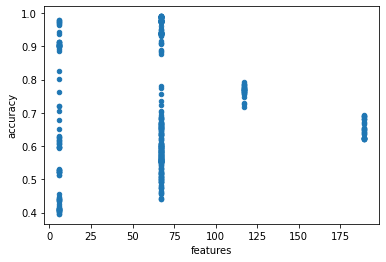

In [3]:
# features related to accuracy
data.plot(kind='scatter', x='features', y='accuracy')
plt.savefig("./images/normalization_naive_features.png")

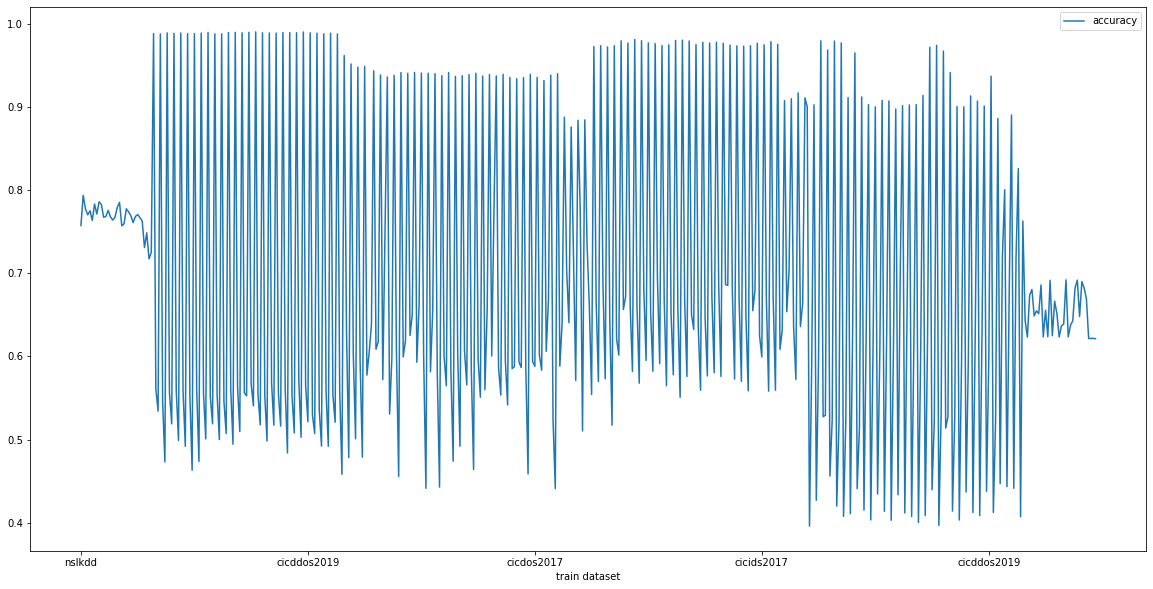

In [4]:
ax = plt.gca()
data.plot(kind='line',x='train dataset',y='accuracy',ax=ax, figsize=(20,10))
plt.savefig("./images/normalization_naive_accuracy_per_dataset.png")

In [5]:
data['model'].unique()

array(['per_dd_DQN_1.pkl', 'per_dd_DQN_2.pkl', 'per_dd_DQN_3.pkl',
       'per_dd_DQN_4.pkl', 'dueling_DQN_1.pkl', 'dueling_DQN_2.pkl',
       'dueling_DQN_3.pkl', 'dueling_DQN_4.pkl', 'double_DQN_1.pkl',
       'double_DQN_2.pkl', 'double_DQN_3.pkl', 'double_DQN_4.pkl',
       'dd_DQN_1.pkl', 'dd_DQN_2.pkl', 'dd_DQN_3.pkl', 'dd_DQN_4.pkl',
       'pn_dd_DQN_1.pkl', 'pn_dd_DQN_2.pkl', 'pn_dd_DQN_3.pkl',
       'pn_dd_DQN_4.pkl', 'pn_per_dd_DQN_1.pkl', 'pn_per_dd_DQN_2.pkl',
       'pn_per_dd_DQN_3.pkl', 'pn_per_dd_DQN_4.pkl', 'vanilla_DQN_1.pkl',
       'vanilla_DQN_2.pkl', 'vanilla_DQN_3.pkl', 'vanilla_DQN_4.pkl',
       'default_A2C_2.pkl', 'default_A2C_3.pkl', 'default_A2C_4.pkl',
       'default_A2C_1.pkl'], dtype=object)

In [6]:
data['model'] = data['model'].str.replace(r'_[1-4]\.pkl', '')

In [7]:
data['model'].unique()

array(['per_dd_DQN', 'dueling_DQN', 'double_DQN', 'dd_DQN', 'pn_dd_DQN',
       'pn_per_dd_DQN', 'vanilla_DQN', 'default_A2C'], dtype=object)

In [8]:
data['train dataset'].unique()

array(['nslkdd', 'cicddos2019', 'cicdos2017', 'cicids2017', 'unswnb15'],
      dtype=object)

In [9]:
data['test dataset'].unique()

array(['nslkdd', 'cicddos2019', 'cicdos2017', 'cicids2017', 'unswnb15'],
      dtype=object)

In [10]:
data['accuracy'] = data['accuracy'].map(lambda x: x * 100)
data['precision'] = data['precision'].map(lambda x: x * 100)
data['recall'] = data['recall'].map(lambda x: x * 100)
data['FPR'] = data['FPR'].map(lambda x: x * 100)

In [11]:
renaming_dict = {
    'vanilla_DQN':'Vanilla_DQN',
    'double_DQN':'Double_DQN',
    'dueling_DQN':'Dueling_DQN',
    'dd_DQN':'DDDQN',
    'per_dd_DQN':'PER_DDDQN',
    'pn_per_dd_DQN':'PER_PN_DDDQN',
    'pn_dd_DQN':'PN_DDDQN',
    'default_A2C':'A2C',
}

In [12]:
data['model'] = data['model'].map(lambda x: renaming_dict[x])

In [13]:
data['model'].unique()

array(['PER_DDDQN', 'Dueling_DQN', 'Double_DQN', 'DDDQN', 'PN_DDDQN',
       'PER_PN_DDDQN', 'Vanilla_DQN', 'A2C'], dtype=object)

In [14]:
# data['train_env'] =  data["train dataset"] + "-" + data["test dataset"] + "-" + data['features'].astype(str)

In [15]:
# if AVERAGE:
#     data = data.groupby(['model', 'train dataset', 'test dataset', 'features']).mean()

In [16]:
# data.head(5)

In [17]:
# data.index

In [18]:
vanilla_dqn_df = data.loc[(data['model'].str.startswith('Vanilla_DQN'),)]
double_dqn_df = data.loc[data['model'].str.startswith('Double_DQN')]
dueling_dqn_df = data.loc[data['model'].str.startswith('Dueling_DQN')]
dddqn_df = data.loc[data['model'].str.startswith('DDDQN')]
per_dddqn_df = data.loc[data['model'].str.startswith('PER_DDDQN')]
pn_per_dddqn_df = data.loc[data['model'].str.startswith('PER_PN_DDDQN')]
pn_dddqn_df = data.loc[data['model'].str.startswith('PN_DDDQN')]
a2c_df = data.loc[data['model'].str.startswith('A2C')]
separated_dfs = [ vanilla_dqn_df, double_dqn_df, dueling_dqn_df, dddqn_df, per_dddqn_df, pn_per_dddqn_df, pn_dddqn_df, a2c_df]

In [19]:
for df in separated_dfs:
    df['train_env'] =  df["train dataset"] + "-" + df["test dataset"] + "-" + df['features'].astype(str)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# for i, df in enumerate(separated_dfs):
#     separated_dfs[i] = df.groupby(['model', 'train dataset', 'test dataset', 'features']).mean()


In [21]:
separated_dfs[0].head(5)

,model,train dataset,test dataset,features,accuracy,precision,recall,FPR,F1 score,notes,train_env
24,Vanilla_DQN,nslkdd,nslkdd,117,76.86,96.93,65.48,3.57,0.78,NaN,nslkdd-nslkdd-117
25,Vanilla_DQN,nslkdd,nslkdd,117,77.09,96.86,65.73,3.62,0.78,NaN,nslkdd-nslkdd-117
26,Vanilla_DQN,nslkdd,nslkdd,117,76.73,96.95,65.34,3.56,0.78,NaN,nslkdd-nslkdd-117
27,Vanilla_DQN,nslkdd,nslkdd,117,76.31,97.01,64.90,3.53,0.78,NaN,nslkdd-nslkdd-117
104,Vanilla_DQN,cicddos2019,cicddos2019,67,98.94,98.74,99.13,1.25,0.99,NaN,cicddos2019-cicddos2019-67


In [22]:
# separated_dfs[1].head()
print(separated_dfs[5].index)

Int64Index([ 20,  21,  22,  23,  92,  93,  94,  95,  96,  97,  98,  99, 100,
            101, 102, 103, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
            150, 151, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
            247, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343,
            420, 421, 422, 423],
           dtype='int64')


In [23]:
generalization_df = separated_dfs[5].loc[separated_dfs[5]['train dataset'] != separated_dfs[5]['test dataset']]
print(generalization_df['model'])

93     PER_PN_DDDQN
94     PER_PN_DDDQN
96     PER_PN_DDDQN
97     PER_PN_DDDQN
99     PER_PN_DDDQN
100    PER_PN_DDDQN
102    PER_PN_DDDQN
103    PER_PN_DDDQN
140    PER_PN_DDDQN
142    PER_PN_DDDQN
143    PER_PN_DDDQN
145    PER_PN_DDDQN
146    PER_PN_DDDQN
148    PER_PN_DDDQN
149    PER_PN_DDDQN
151    PER_PN_DDDQN
236    PER_PN_DDDQN
237    PER_PN_DDDQN
239    PER_PN_DDDQN
240    PER_PN_DDDQN
242    PER_PN_DDDQN
243    PER_PN_DDDQN
245    PER_PN_DDDQN
246    PER_PN_DDDQN
333    PER_PN_DDDQN
334    PER_PN_DDDQN
336    PER_PN_DDDQN
337    PER_PN_DDDQN
339    PER_PN_DDDQN
340    PER_PN_DDDQN
342    PER_PN_DDDQN
343    PER_PN_DDDQN
Name: model, dtype: object


Vanilla_DQN
Double_DQN
Dueling_DQN
DDDQN
PER_DDDQN
PER_PN_DDDQN
PN_DDDQN
A2C


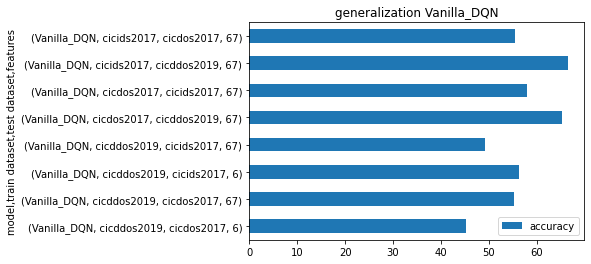

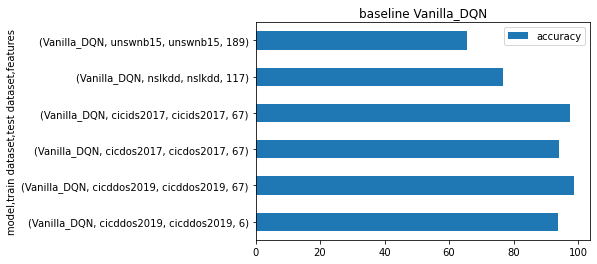

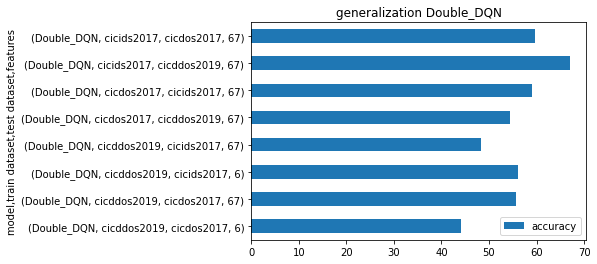

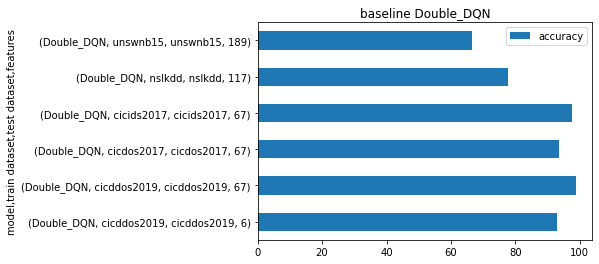

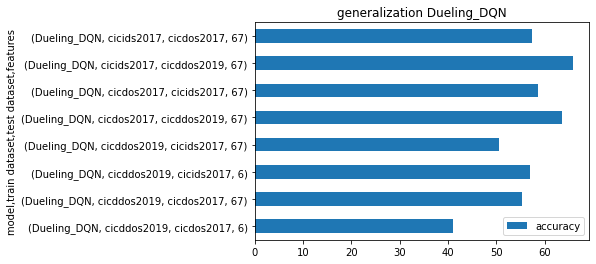

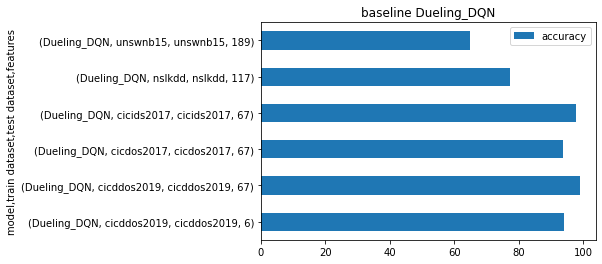

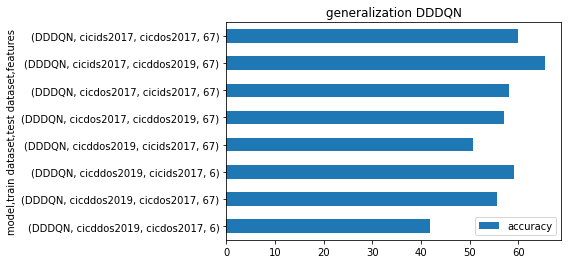

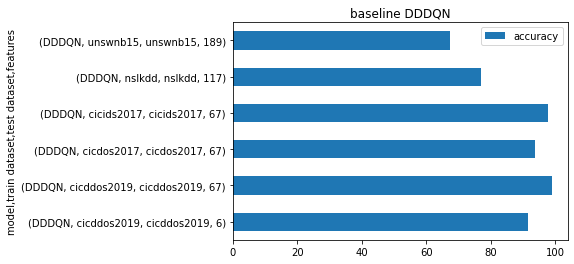

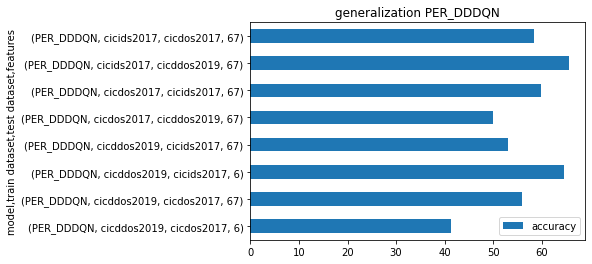

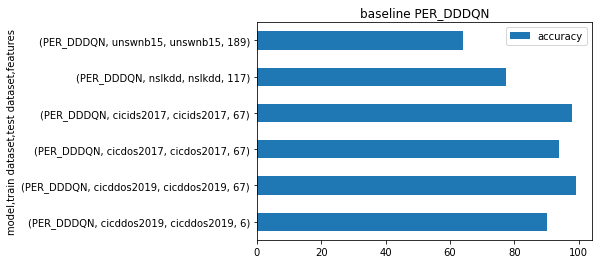

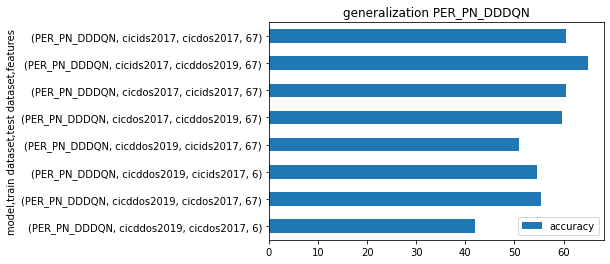

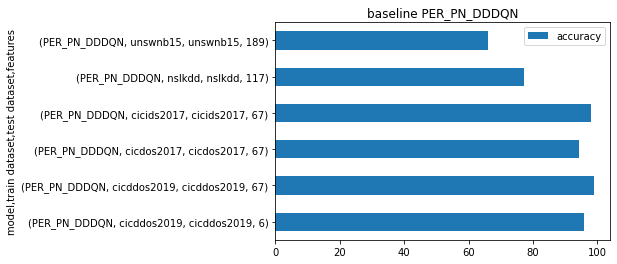

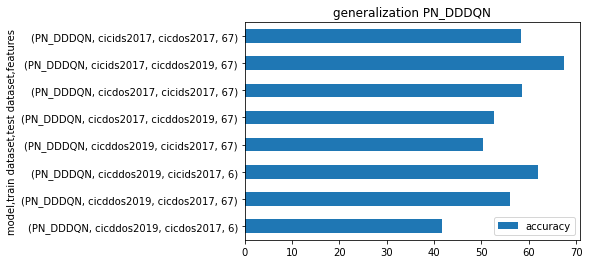

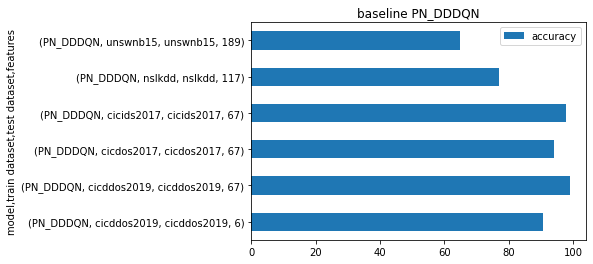

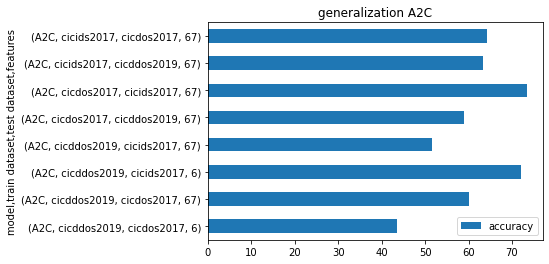

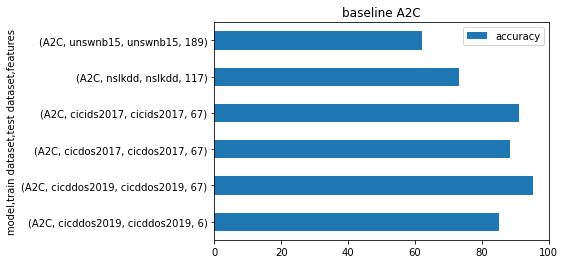

In [24]:
for i, df in enumerate(separated_dfs):
    generalization_df = df.loc[df['train dataset'] != df['test dataset']]
    baseline_df = df.loc[df['train dataset'] == df['test dataset']]
    baseline_df = baseline_df.groupby(['model', 'train dataset', 'test dataset', 'features']).mean()
    generalization_df = generalization_df.groupby(['model', 'train dataset', 'test dataset', 'features']).mean()
    print(generalization_df.index[0][0])
    generalization_df.plot(kind='barh', y='accuracy', title='generalization ' + generalization_df.index[0][0])
    plt.savefig(f"./images/normalization_generalization_{generalization_df.index[0][0]}.png")
    baseline_df.plot(kind='barh', y='accuracy', title='baseline ' + baseline_df.index[0][0])
    plt.savefig(f"./images/normalization_baseline_{baseline_df.index[0][0]}.png")

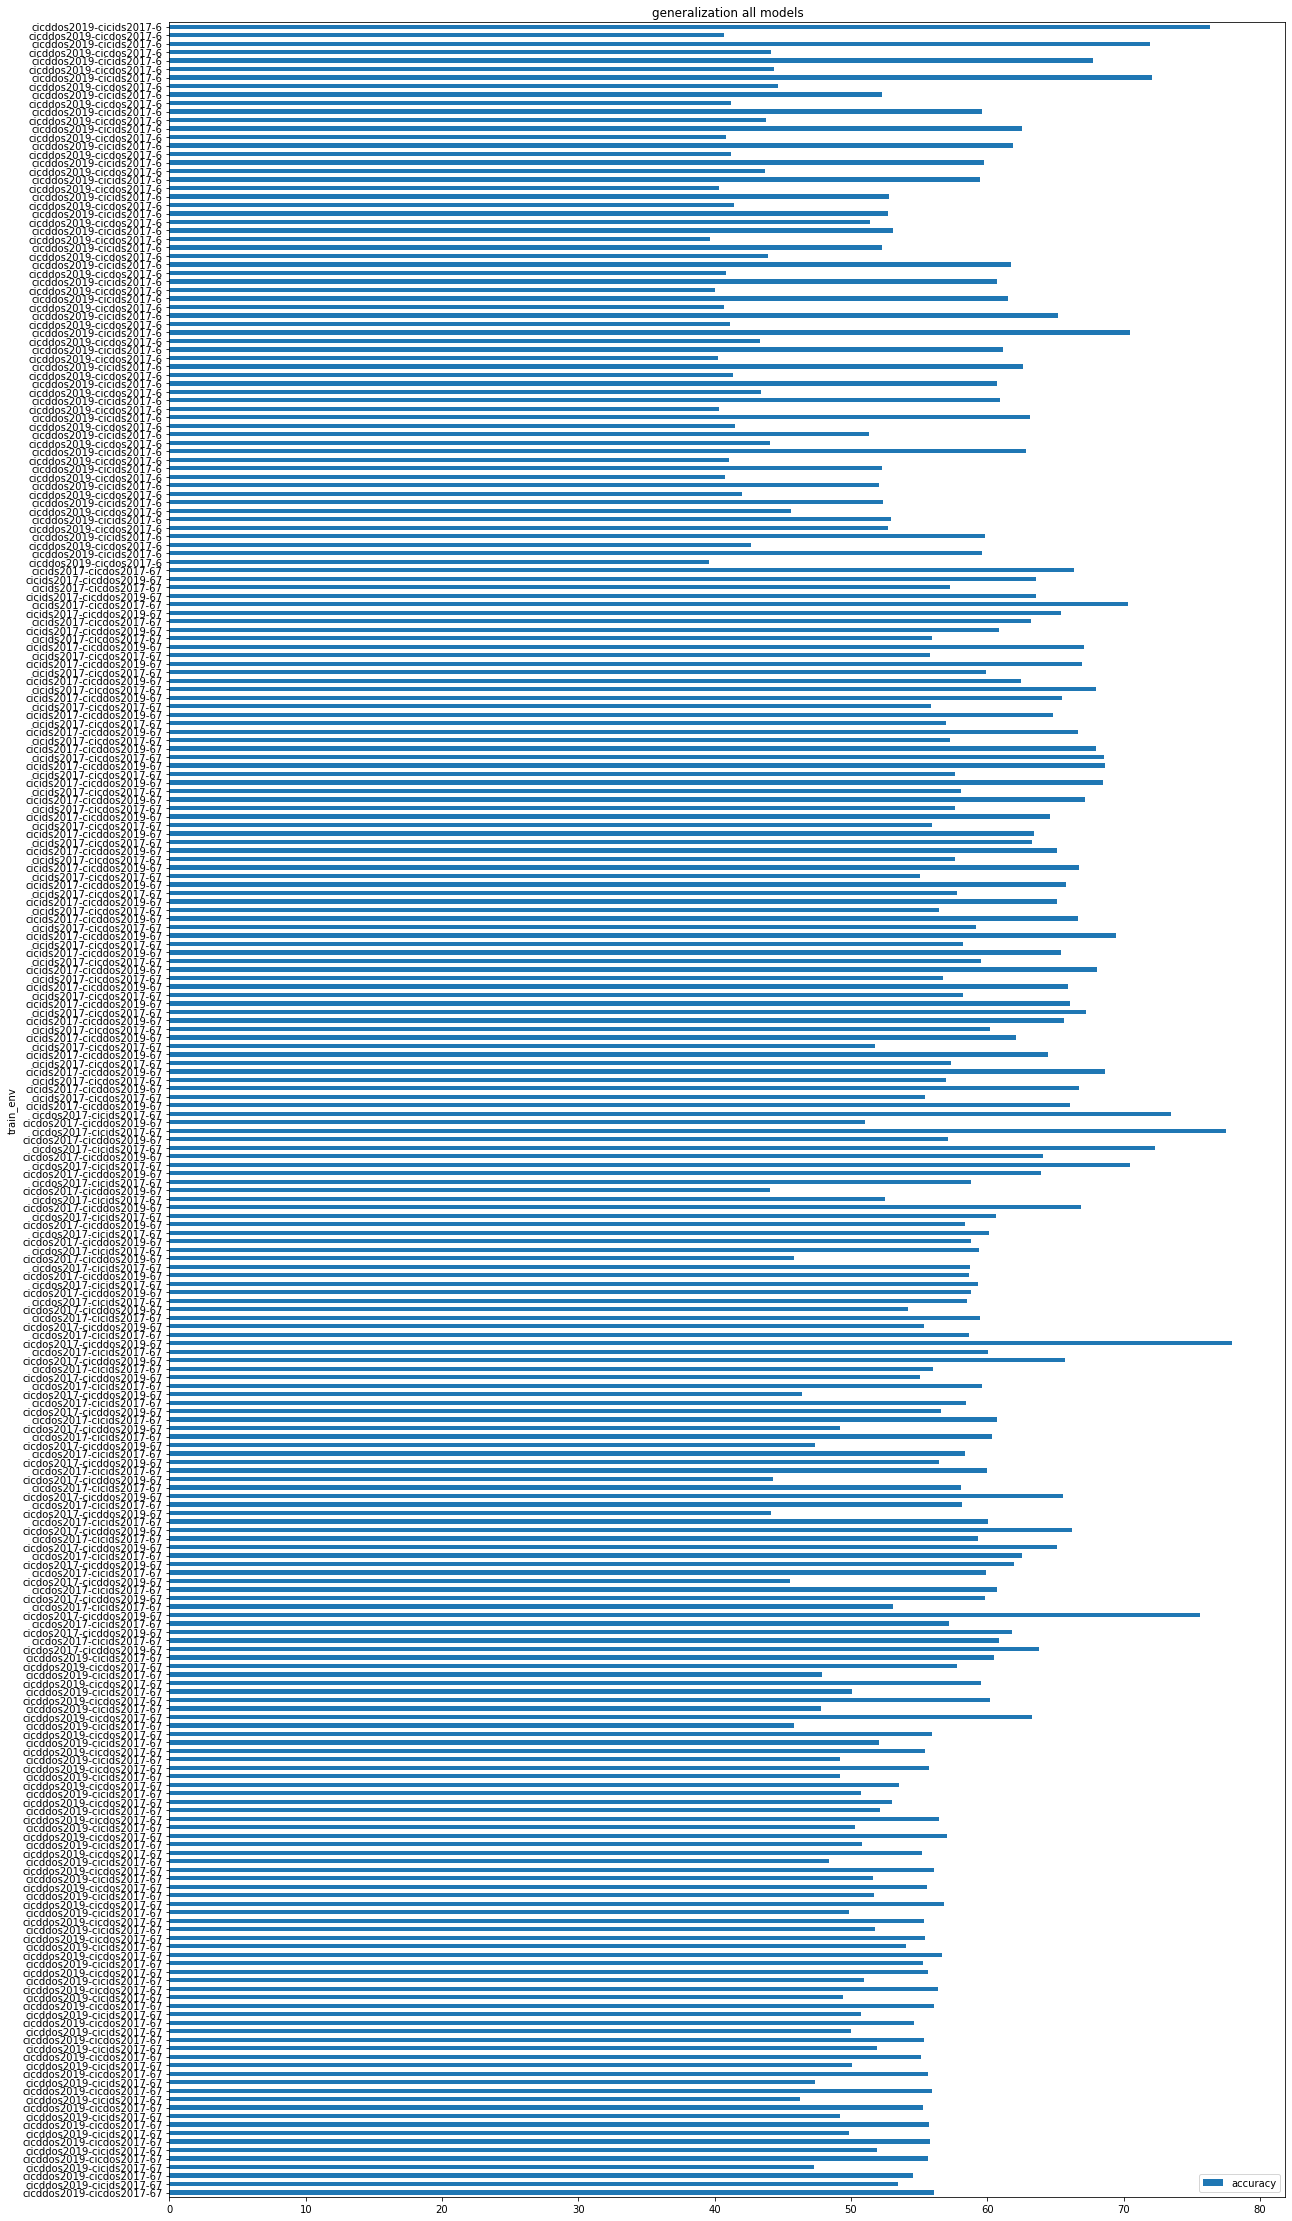

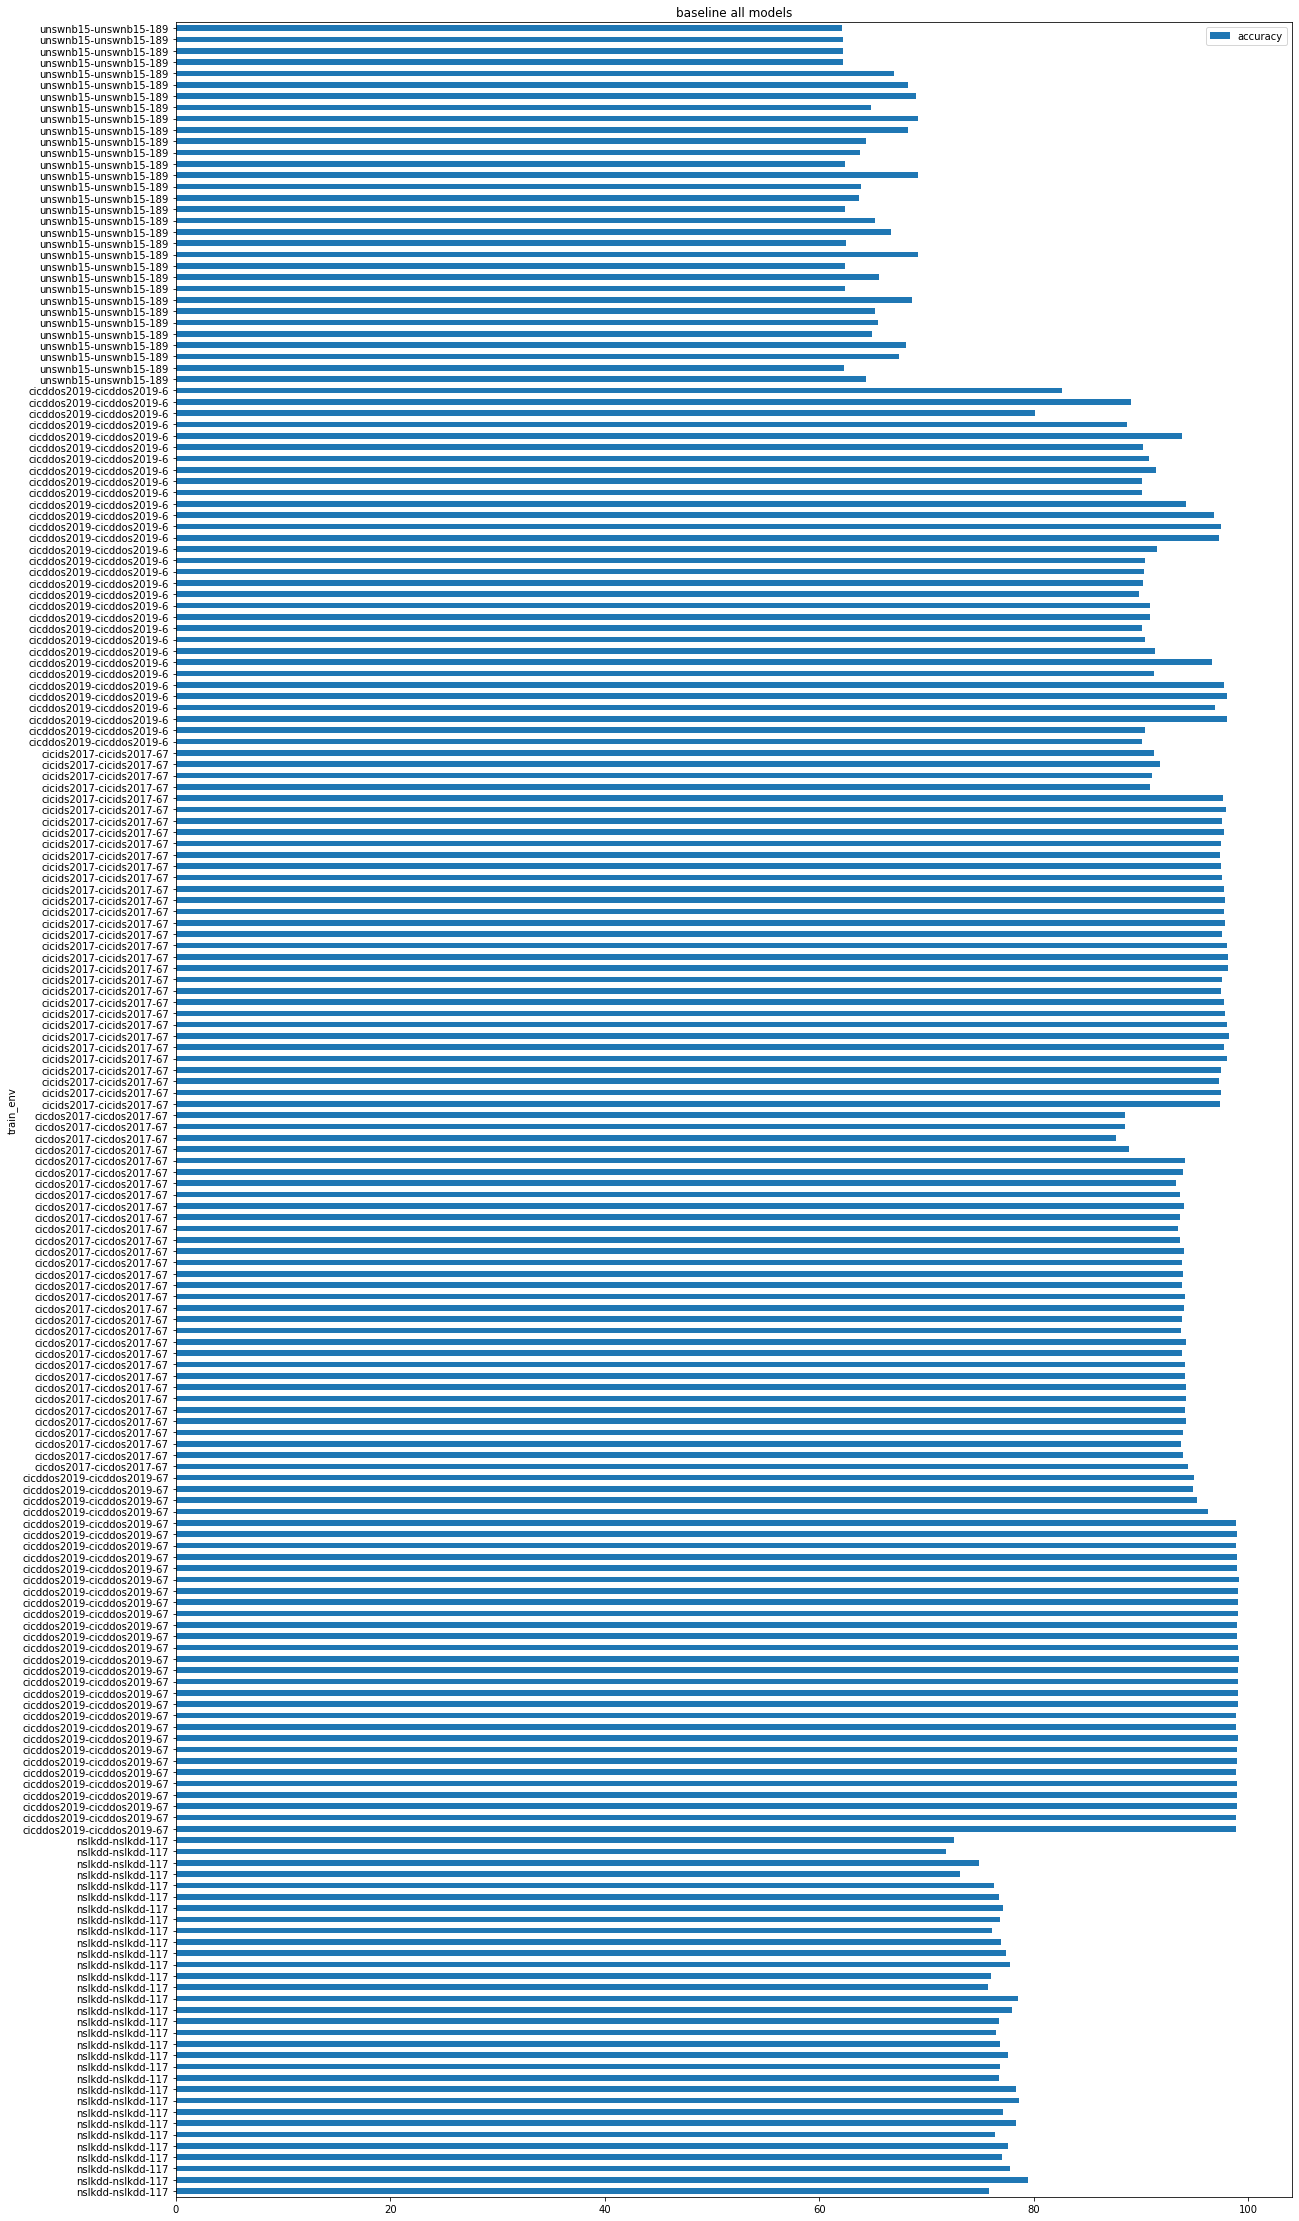

In [25]:
data['train_env'] =  data["train dataset"] + "-" + data["test dataset"] + "-" + data['features'].astype(str)
generalization_df = data.loc[data['train dataset'] != data['test dataset']]
baseline_df = data.loc[data['train dataset'] == data['test dataset']]
generalization_df.plot(kind='barh', x='train_env', y='accuracy', title='generalization all models', figsize=(20,40))
plt.savefig(f"./images/normalization_generalization_all.png")
baseline_df.plot(kind='barh', x='train_env', y='accuracy', title='baseline all models', figsize=(20,40))
plt.savefig(f"./images/normalization_baseline_all.png")

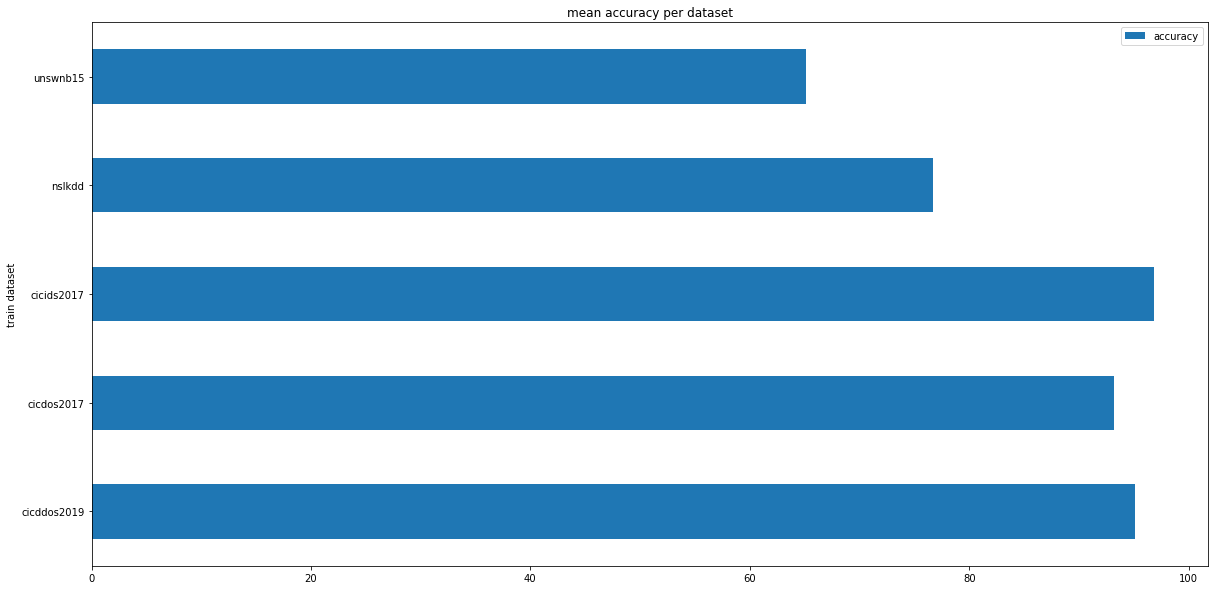

In [26]:
grouped_baseline_df = baseline_df.groupby(['train dataset']).mean()
grouped_baseline_df.plot(kind='barh',  y='accuracy', title='mean accuracy per dataset', figsize=(20,10))
plt.savefig(f"./images/normalization_baseline_mean_accuracy.png")

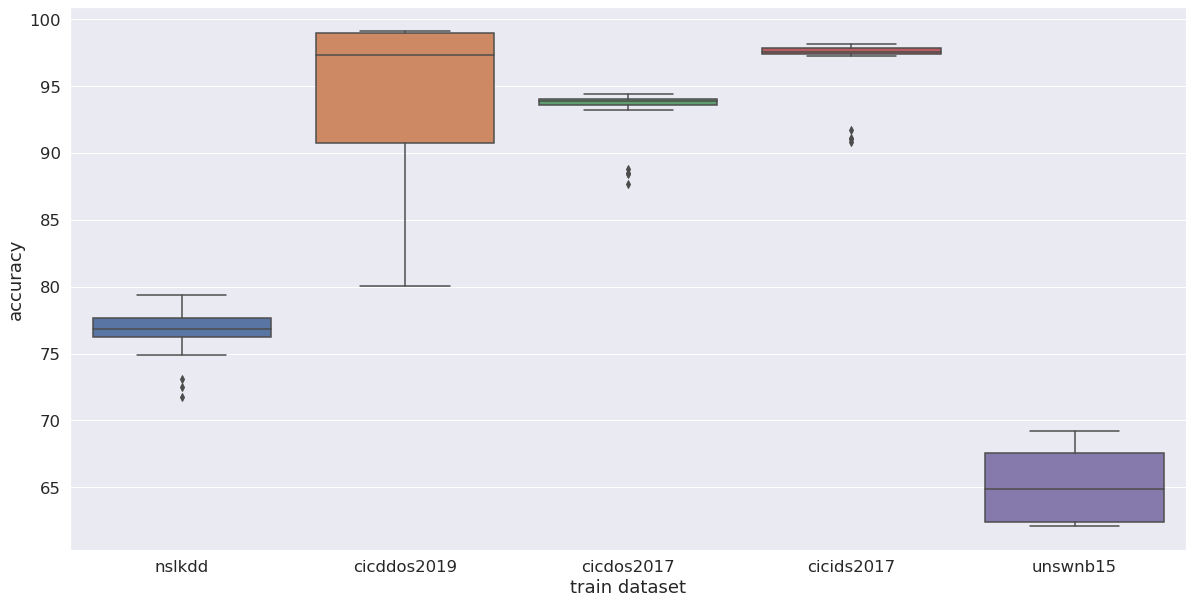

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.set(font_scale = 1.5)
sns.boxplot(x = 'train dataset', y = 'accuracy', data = baseline_df)
plt.savefig(f"./images/normalization_baseline_accuracy_boxplot_dataset.png")

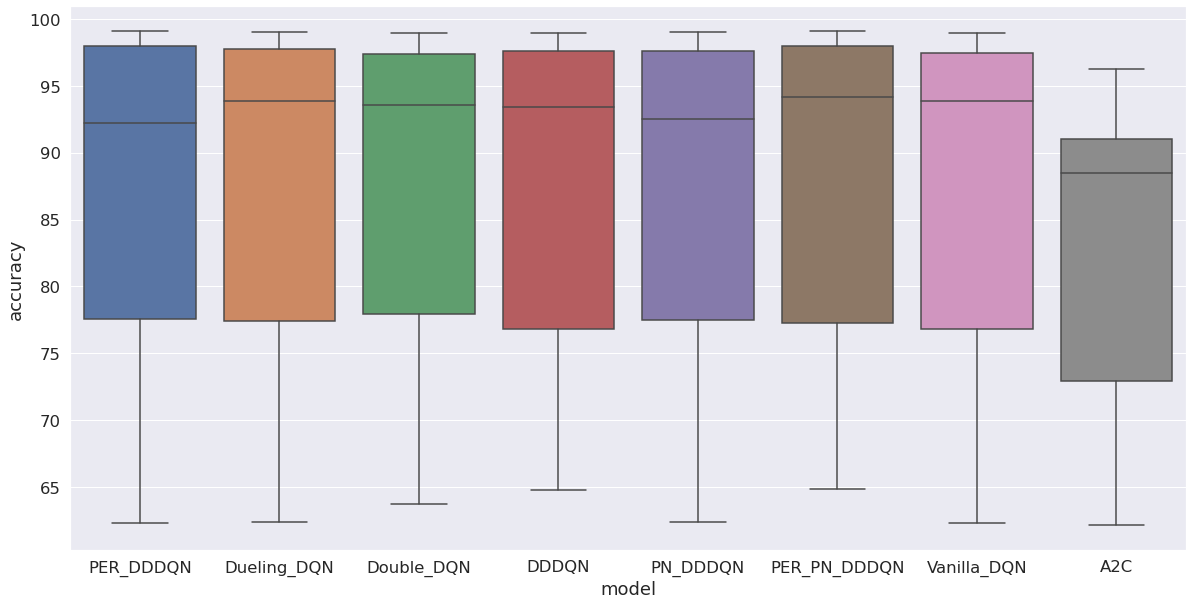

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.set(font_scale = 1.5)
sns.boxplot(x = 'model', y = 'accuracy', data = baseline_df)
plt.savefig(f"./images/normalization_baseline_accuracy_boxplot_model.png")

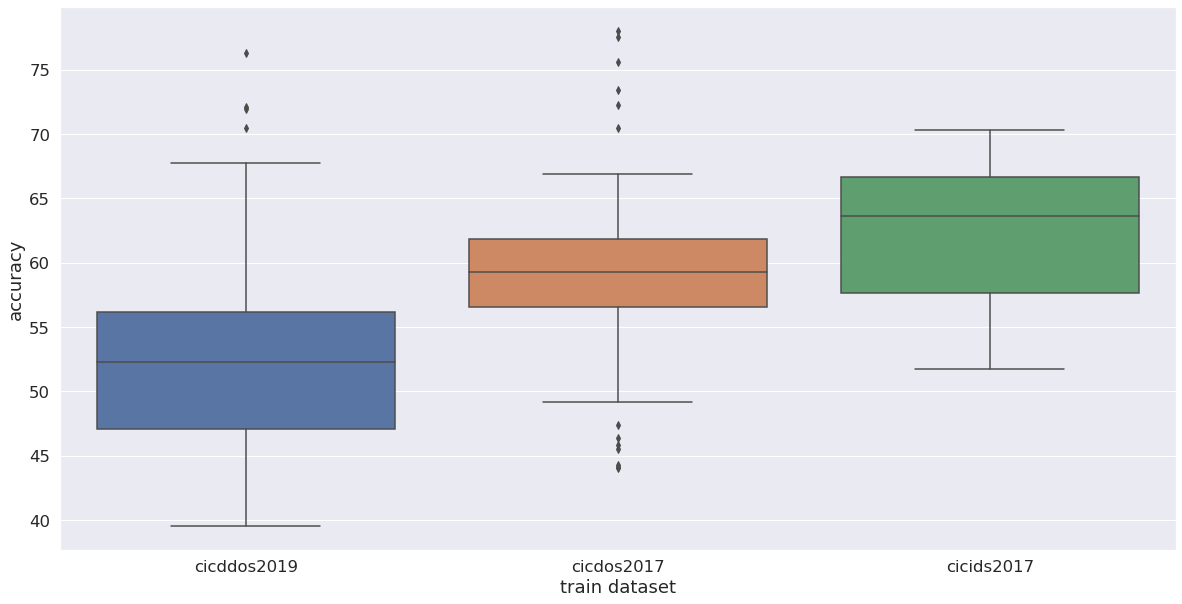

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.set(font_scale = 1.5)
sns.boxplot(x = 'train dataset', y = 'accuracy', data = generalization_df)
plt.savefig(f"./images/normalization_generalization_accuracy_boxplot_datasets.png")

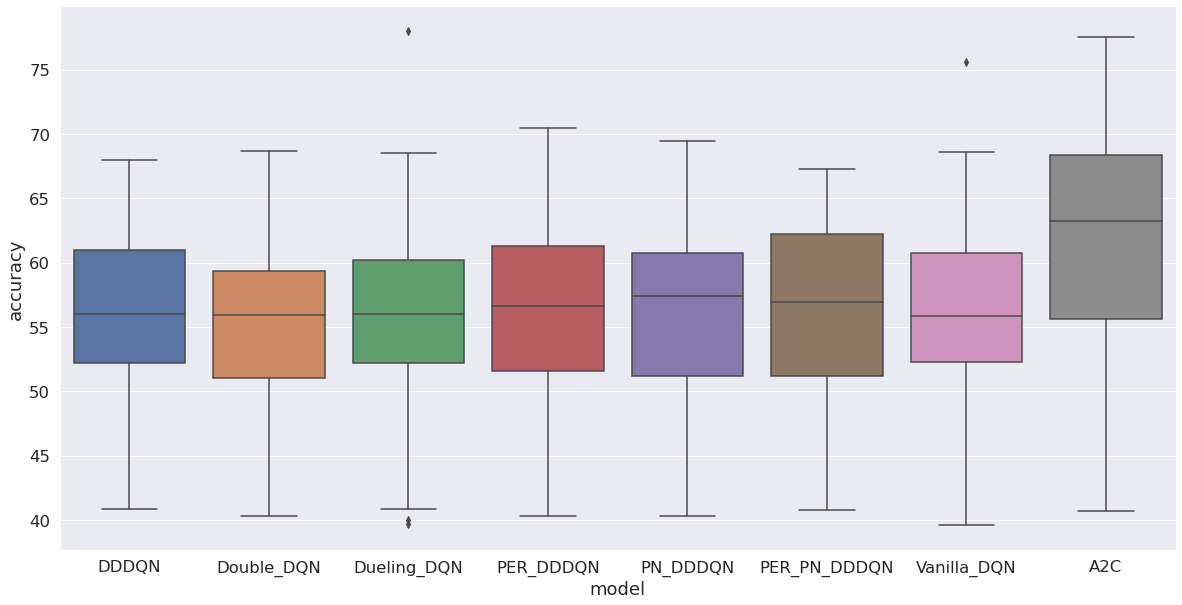

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.set(font_scale = 1.5)
sns.boxplot(x = 'model', y = 'accuracy', data = generalization_df)
plt.savefig(f"./images/normalization_generalization_accuracy_boxplot_models.png")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

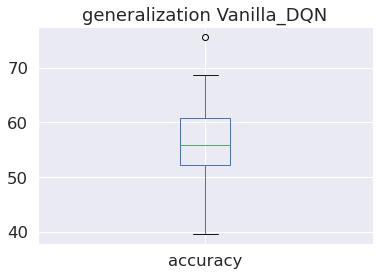

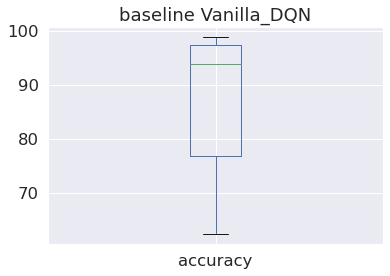

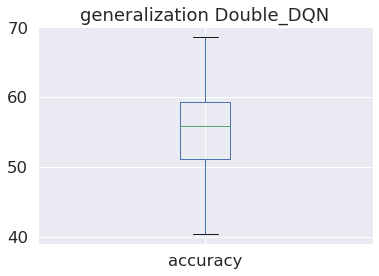

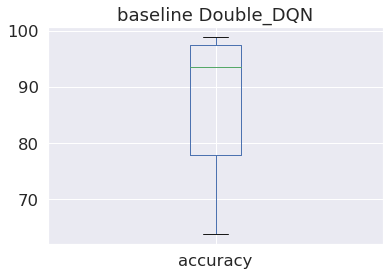

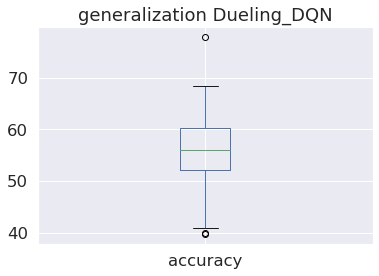

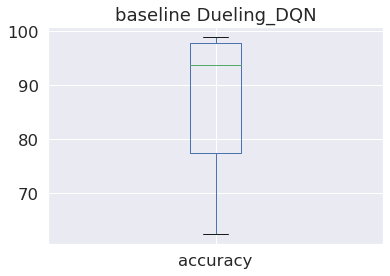

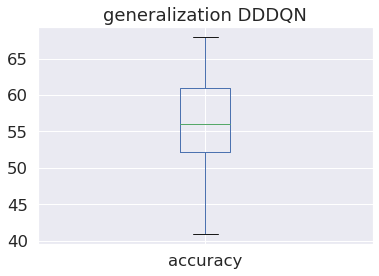

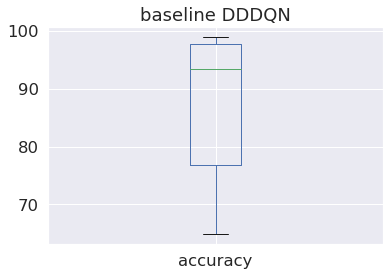

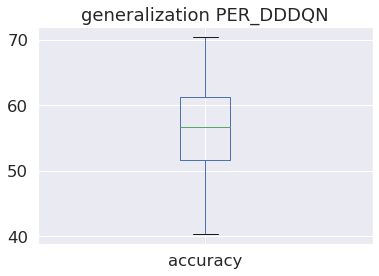

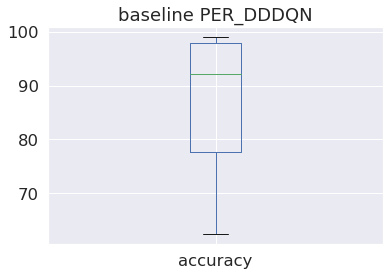

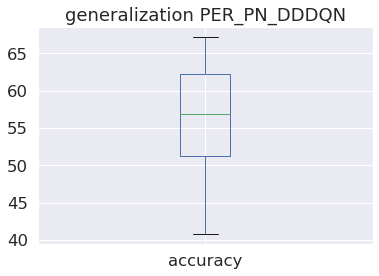

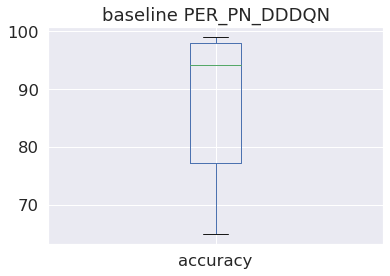

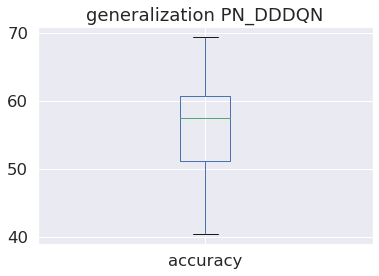

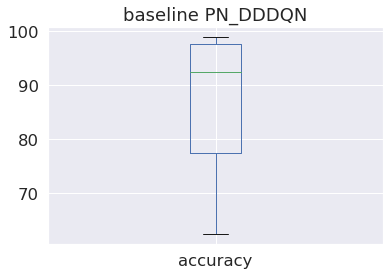

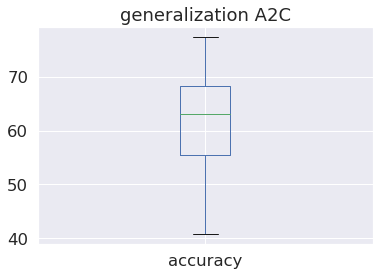

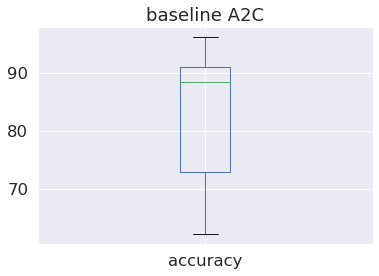

In [31]:
for df in separated_dfs:
    df['train_env'] =  df["train dataset"] + "-" + df["test dataset"] + "-" + df['features'].astype(str)
    generalization_df = df.loc[df['train dataset'] != df['test dataset']]
    baseline_df = df.loc[df['train dataset'] == df['test dataset']]
    generalization_df.plot(kind='box', x='train_env', y='accuracy', title='generalization ' + df['model'].iloc[0])
    plt.savefig(f"./images/normalization_generalization_boxplot_{df['model'].iloc[0]}.png")
    baseline_df.plot(kind='box', x='train_env', y='accuracy', title='baseline ' + df['model'].iloc[0])
    plt.savefig(f"./images/normalization_baseline_boxplot_{df['model'].iloc[0]}.png")

In [32]:
f = open('/project/masterproef-machine-learning-for-network-intrusion-detection/scripts/tex-files/normalization_tables.tex', 'a')
for i, df in enumerate(separated_dfs):
    df['train_env'] =  df["train dataset"] + "-" + df["test dataset"] + "-" + df['features'].astype(str)
    generalization_df = df.loc[df['train dataset'] != df['test dataset']]
    baseline_df = df.loc[df['train dataset'] == df['test dataset']]
    b_model = baseline_df['model'].iloc[0]
    g_model = generalization_df['model'].iloc[0]
    baseline_df = baseline_df.groupby(['model', 'train dataset', 'test dataset', 'features']).mean()
    generalization_df = generalization_df.groupby(['model', 'train dataset', 'test dataset', 'features']).mean()
    baseline_df = baseline_df.reset_index()
    generalization_df = generalization_df.reset_index()
    generalization_df = generalization_df.drop(columns=['notes', 'model'])
    baseline_df = baseline_df.drop(columns=['notes', 'test dataset', 'model'])
    generalization_df = generalization_df.sort_values(by=['train dataset', 'features', 'accuracy'], ascending=False)
    baseline_df = baseline_df.sort_values(by=['train dataset', 'features','accuracy'], ascending=False)
    base_tex = baseline_df.to_latex(index=False)
    gen_tex = generalization_df.to_latex(index=False)
    f.write(f"==========={b_model}===========\n")
    f.write(f"\\begin{{table}}[H]\n\\centering\n\\captionsetup{{justification=centering}}\n\\caption[Baseline metrics {b_model}]{{Baseline metrics {b_model}}}\n\\label{{tab:norm_{b_model}_base}}\n\\resizebox{{\\textwidth}}{{!}}{{%\n")
    f.write(base_tex)
    f.write(f"}}\n\\end{{table}}\n")
    f.write(f"\\begin{{table}}[H]\n\\centering\n\\captionsetup{{justification=centering}}\n\\caption[Generalization metrics {g_model}]{{Generalization metrics {g_model}}}\n\\label{{tab:norm_{g_model}_gen}}\n\\resizebox{{\\textwidth}}{{!}}{{%\n")
    f.write(gen_tex)
    f.write(f"}}\n\\end{{table}}\n")
f.close()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
f = open('/project/masterproef-machine-learning-for-network-intrusion-detection/scripts/tex-files/normalization_tables.tex', 'a')
for i, df in enumerate(separated_dfs):
    df['train_env'] =  df["train dataset"] + "-" + df["test dataset"] + "-" + df['features'].astype(str)
    generalization_df = df.loc[df['train dataset'] != df['test dataset']]
    baseline_df = df.loc[df['train dataset'] == df['test dataset']]
    b_model = baseline_df['model'].iloc[0]
    g_model = generalization_df['model'].iloc[0]
    generalization_df = generalization_df.drop(columns=['notes', 'train_env','model'])
    baseline_df = baseline_df.drop(columns=['notes', 'test dataset', 'train_env', 'model'])
    generalization_df = generalization_df.sort_values(by=['train dataset', 'features', 'accuracy'], ascending=False)
    baseline_df = baseline_df.sort_values(by=['train dataset', 'features','accuracy'], ascending=False)
    base_tex = baseline_df.to_latex(index=False)
    gen_tex = generalization_df.to_latex(index=False)
    f.write(f"==========={b_model}===========\n")
    f.write(f"\\begin{{table}}[H]\n\\centering\n\\captionsetup{{justification=centering}}\n\\caption[Baseline metrics {b_model}]{{Baseline metrics {b_model}}}\n\\label{{tab:norm_{b_model}_base_full}}\n\\resizebox{{\\textwidth}}{{!}}{{%\n")
    f.write(base_tex)
    f.write(f"}}\n\\end{{table}}\n")
    f.write(f"\\begin{{table}}[H]\n\\centering\n\\captionsetup{{justification=centering}}\n\\caption[Generalization metrics {g_model}]{{Generalization metrics {g_model}}}\n\\label{{tab:norm_{g_model}_gen_full}}\n\\resizebox{{\\textwidth}}{{!}}{{%\n")
    f.write(gen_tex)
    f.write(f"}}\n\\end{{table}}\n")
f.close()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
